<a href="https://colab.research.google.com/github/Soroosh-N/Deep-learning-basics/blob/main/HW1_soroosh_noorzad_99205372.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deep learning assignment - 1st series<br/>**
Soroosh Noorzad - 99205372<br/>
soroosh.noorzad@gmail.com<br/>
Phone : +989111853686<br/>
Date : 1400.08

# **READ ME FIRST :**
To See the results of **Question 1 parts**, please run the cells one by one untill reaching the answering sections.<br/>
To See the results of **Question 2 parts**, please scroll down to the Q2 section, then run its cells.<br/>

---

Note that, we will have our necessary descriptions on the report of the assignment.

---

**Contents of the notebook :**
*   Libraries (Q1)
*   Functions (Q1)
*   Datasets (Q1)
*   Answer to section Q1.1
*   Answer to section Q1.2-3-4-5-6
*   Answer to section Q1.7
*   Answer to section Q2



# **Libraries :**
This is the place where all the libraries of the question one will be gathered.

In [1]:
# We should use tensorflow 1 in our project, so:
%tensorflow_version 1.x
import tensorflow as tf
print('TensorFlow version :', tf.__version__)

# Other libraries
import cv2
import math
import time
import itertools
import numpy as np
import pandas as pd
from threading import Thread
from matplotlib import pyplot as plt
from PIL import ImageDraw, Image, ImageFont

TensorFlow 1.x selected.
1.15.2


# **Functions :**
All the general functions which can be used all over the project will be here to prevenet repition.

In [4]:
def csv_file_to_numpy_array(csv_file):
    """
    Convert this special dataset csv files to numpy arrays
    :param csv_file:        input csv file
    :return:                inputs and their corresponding labels
    """
    x_df = csv_file.drop(csv_file.columns[0], axis=1).div(255).to_numpy()
    y_df = csv_file.drop(csv_file.columns[1:], axis=1)
    XX = []
    for row in x_df:
        XX.append(np.reshape(row, (28, 28)))
    return np.array(XX), y_df[0].to_numpy()


def line_def(string="-", line_length=60):
    """
    print a line on the output
    :param string:          the character line made of
    :param line_length:     the length of line
    :return:                the line to be printed
    """
    return ''.join(string for _ in range(line_length))


def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap='Oranges'):
    """
    This function prints and plots the confusion matrix.
    :param cm:              Confusion Matrix
    :param classes:         Labels to be printed on the plot
    :param normalize:       Normalization can be applied by setting `normalize=True`.
    :param title:           The plot title
    :param cmap:            Color of the plot
    :return:                nothing
    """
    plt.figure(figsize=(12, 12))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('Labels')
    plt.xlabel('Predictions')
    plt.subplots_adjust(left=0.1, right=1, top=0.95, bottom=0.05)


def bar_plot(input_vector, input_labels, input_texts):
    """
    Print a bar plot from the input data
    :param input_vector:        the input data
    :param input_labels:        the classes to be counted
    :param input_texts:         the titles and labels and other stuff of the plot
    :return:                    nothing
    """
    fig = plt.figure()
    t = [input_labels[i] for i in range(len(input_labels))]
    count = [0 for _ in range(len(input_labels))]
    for i, _ in enumerate(input_vector):
        count[input_vector[i]] += 1
    ax = fig.add_subplot(1, 1, 1)
    ax.bar(t, count, color="#4CAF50", width=0.3)
    ax.set_title(input_texts[0])
    ax.set_ylabel(input_texts[1])
    ax.set_xlabel(input_texts[2])
    # ax.legend(loc="best")
    plt.show()


def plot_2d(dimension, docs, label, legends, colors, plot_type="plot", marker="."):
    """
    To plot 2d figures (With the use of matplotlib)
    ----------
    Parameters:
        dimension (list): A list of all the sections of one figure, e.g. in 2x2 figs we have 221, 222, 223, 224 dims.
        docs (list): This gonna be tricky. :) We included all the plots on this variable in such a format that we can
        use this function under different situations.
        label (list): A complex list of labels for all the plots in each figure.
        legends (list): A list of corresponding legends to describe every curve in the plots.
        colors (list): A list of corresponding colors for every curve we see in the plots.
        plot_type (str): Should we sketch the main curve by scattering or plotting? or maybe histogram?
        marker (str): The main plot marker.
    ----------
    Returns:
        (Object) The function will return the created figure (by the use of matplotlib).
    """
    fig = plt.figure()
    for i, d in enumerate(docs):
        ax = fig.add_subplot(dimension[i])
        t1 = np.arange(0, len(d[0]), 1)
        for j in range(len(d)):
            if plot_type == "scatter":
                ax.scatter(t1, d[j], color=(colors[j]), marker=marker, label=legends[j])
                ax.set_ylim(bottom=-1.1, top=1.1)
            else:
                # simple plotting
                ax.plot(t1, d[j], color=(colors[j]), label=legends[j])
        ax.set_title(label[0][i])
        ax.set_xlabel(label[1])
        ax.set_ylabel(label[2])
        ax.grid(which='both')
        ax.legend(loc="best")
        # manager = plt.get_current_fig_manager()
        # manager.window.showMaximized()
    return fig


def print_res(figs, titles, ext="pdf"):
    """
    This is a function of saving final plots to the output files
    ----------
    Parameters:
        figs (list): A list of figure objects, produced with matplotlib.
        titles (list): A list of titles corresponding to the figures given above. We use these as output file names.
        ext (str): What extension(type) are the final outputs.
    ----------
    Returns:
        Nothing
    """
    # Let's sleep one second. Don't rush! The figures are not ready yet! A little latency will results better pictures!
    time.sleep(1)
    for i, fig in enumerate(figs):
        fig.savefig(titles[i] + "." + ext)


def remove_uniformly(x_data, y_data, label_position, how_much=5):
    """
    This function will remove samples from dataset and leave one of 'how_much' samples to be untouched
    :param x_data:              input data to be sampled
    :param y_data:              labels to be sampled
    :param label_position:      what label to be removed uniformly
    :param how_much:            how is the sampling rate
    :return:                    the sampled dataset
    """
    c = 0
    members_to_delete = []
    for index, y in enumerate(y_data):
        if y == label_position-1:
            c += 1
            if c == how_much:
                c = 0
            else:
                members_to_delete.append(index)
    x_data = np.delete(x_data, members_to_delete, axis=0)
    y_data = np.delete(y_data, members_to_delete)
    return x_data, y_data


def confusion_accuracy(confusion_matrix):
    """
    This function will provide accuracy of each of confusion matrix labels
    :param confusion_matrix:        The confusion matrix
    :return:                        A list of labels accuracy, and! mean of that list
    """
    labels_acc = [0 if sum(row) == 0 else round(row[index] / sum(row), 2) for index, row in enumerate(confusion_matrix)]
    mean_accuracy = round(sum(labels_acc)/len(labels_acc), 2)
    return labels_acc, mean_accuracy


# **Datasets :**
Loading dataset from google colab.

In [3]:
from google.colab import drive 
drive.mount('/content/gdrive')

labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
          'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S',
          'T', 'U', 'V', 'W', 'X', 'Y']


Mounted at /content/gdrive


# **Answer to section Q1.1 :**

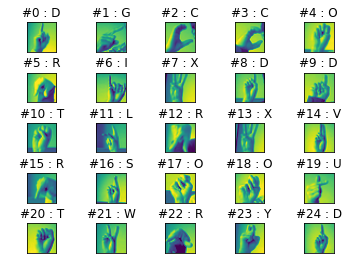

In [7]:
csv=pd.read_csv('gdrive/MyDrive/golab/datasets/Q1_train.csv', delimiter=',', nrows=25)
for index, row in csv.iterrows():
    vec = []
    for j in range(len(row) - 1):
        vec.append(row["pixel" + str(j + 1)])
    mat = vec2mat(vec, 28)
    img = Image.fromarray(np.uint8(mat), 'L')
    plt.subplot(5,5,index+1)
    plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    plt.subplots_adjust(bottom=0.1, top=0.9, wspace=None, hspace=0.7)
    plt.title("#"+str(index) + " : " + str(labels[row['label']]))
    plt.imshow(img)
plt.show(img)


# **Answer to section Q1.2 :**